day02 - EDA_Superstore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#i have done this part because i'm doing in google colab
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.to_csv("Clean_Superstore.csv", index=False)

# Load cleaned dataset
df = pd.read_csv("Clean_Superstore.csv")

df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


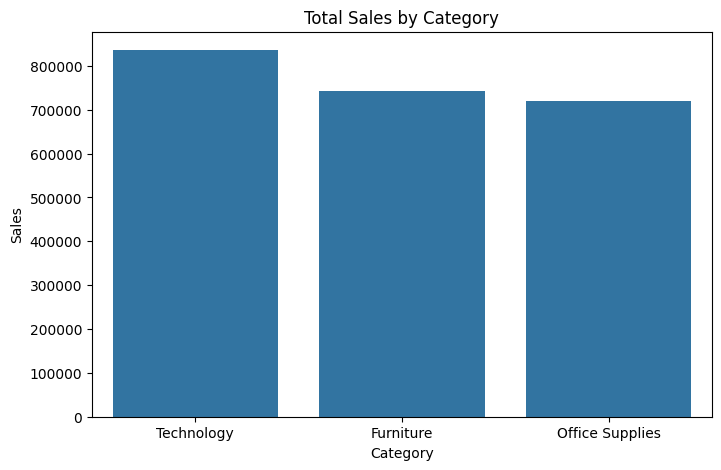

In [2]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_sales)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()


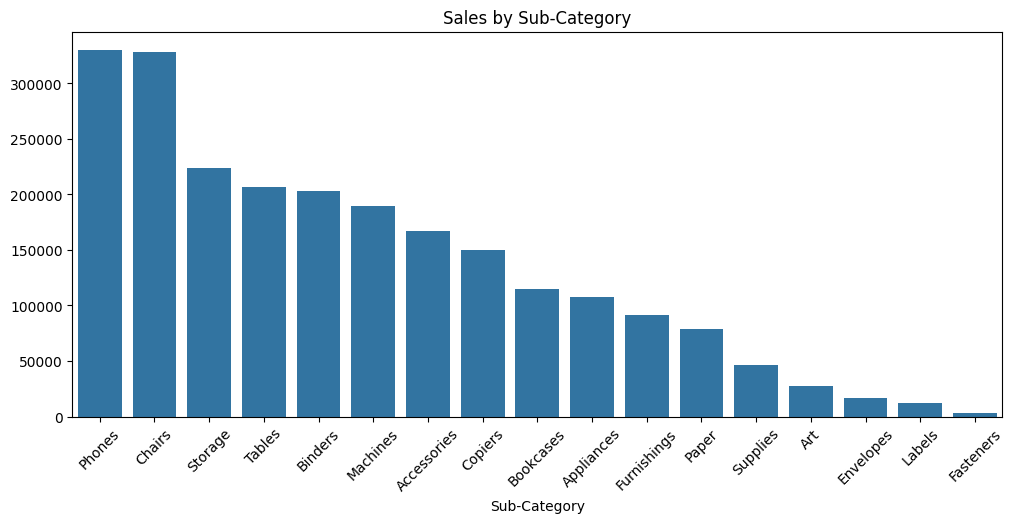

In [3]:
subcat_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=subcat_sales.index, y=subcat_sales.values)
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.show()


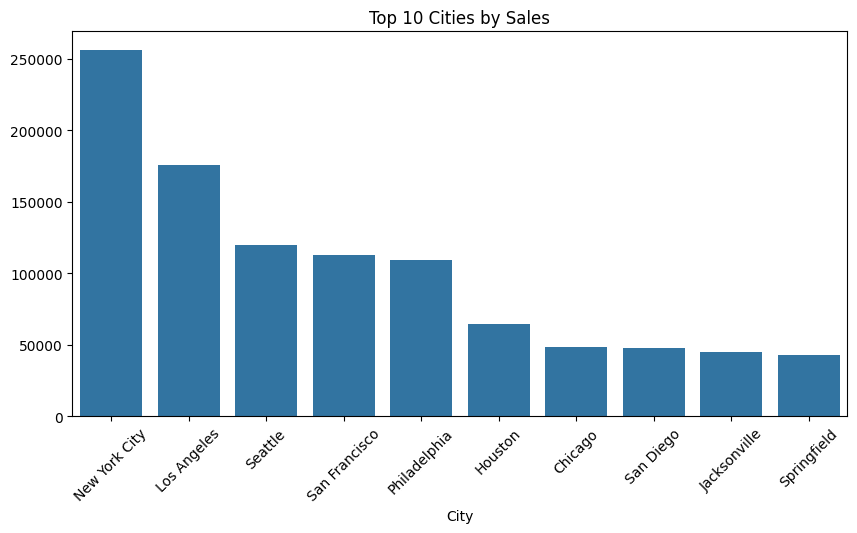

In [4]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.title("Top 10 Cities by Sales")
plt.xticks(rotation=45)
plt.show()


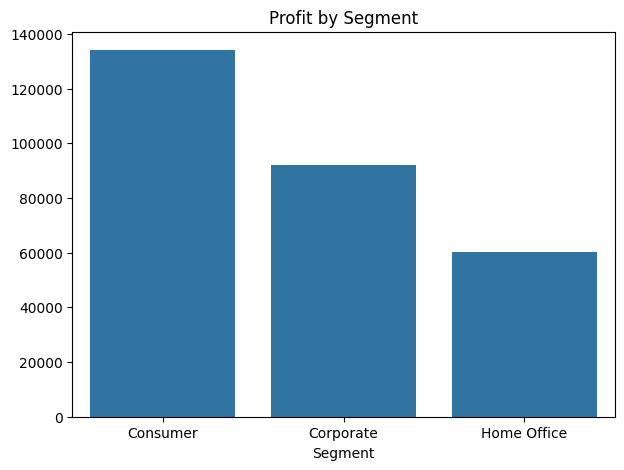

In [5]:
segment_profit = df.groupby("Segment")["Profit"].sum()

plt.figure(figsize=(7,5))
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title("Profit by Segment")
plt.show()

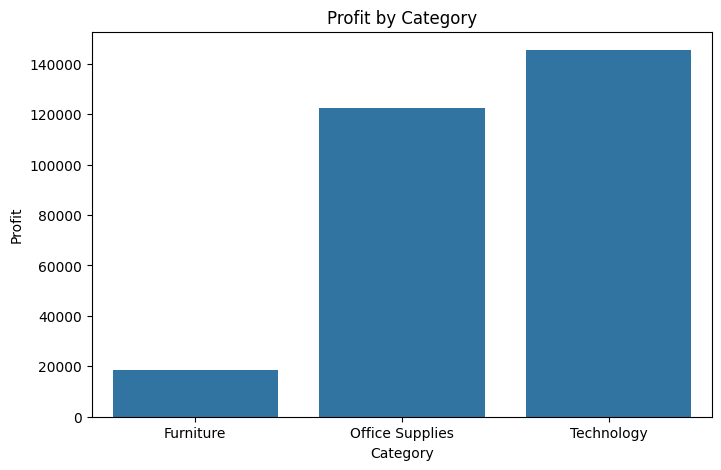

In [6]:
category_profit = df.groupby("Category")["Profit"].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.show()


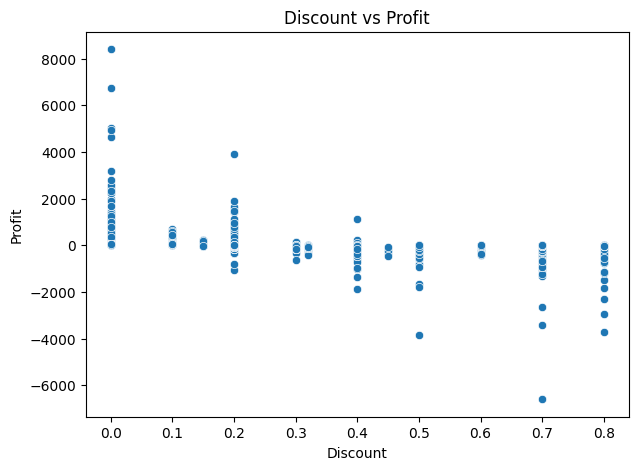

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Discount"], y=df["Profit"])
plt.title("Discount vs Profit")
plt.show()

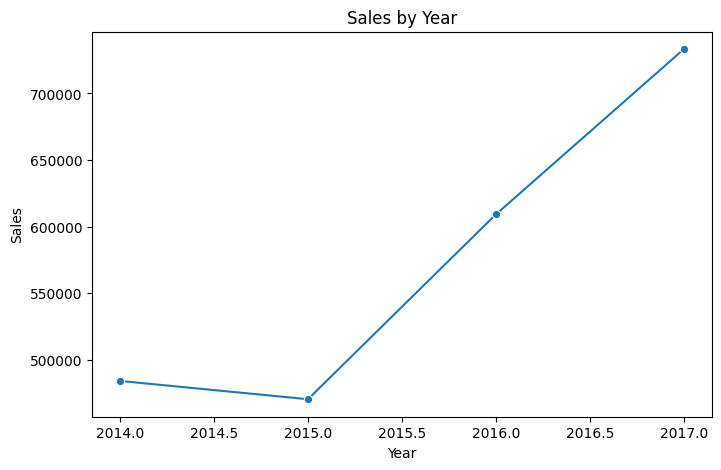

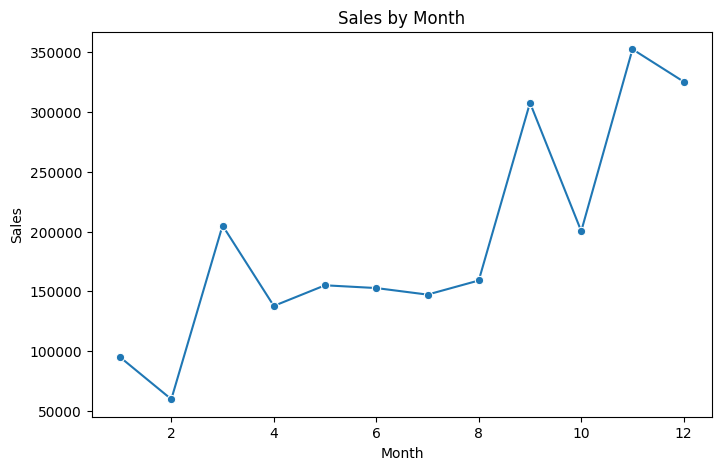

In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

yearly_sales = df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker="o")
plt.title("Sales by Year")
plt.ylabel("Sales")
plt.show()

monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("Sales by Month")
plt.ylabel("Sales")
plt.show()

In [9]:
import os

# Create the 'charts' directory if it doesn't exist
if not os.path.exists('charts'):
    os.makedirs('charts')

plt.savefig("charts/category_sales.png")

<Figure size 640x480 with 0 Axes>